<a href="https://colab.research.google.com/github/Abhishek9264/model/blob/main/bookreview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("reviews.csv")

In [ ]:
df.head(5)

,stars,comment,book_url
0,5.0,"Let me say at the outset of this review, that ...",https://www.amazon.com/dp/1492041130
1,1.0,Its Capitalism at its best. I read the book fr...,https://www.amazon.com/dp/1492041130
2,5.0,If you're looking to get started with data sci...,https://www.amazon.com/dp/1492041130
3,4.0,"In general, this is a good book. It covers a w...",https://www.amazon.com/dp/1492041130
4,5.0,I was an academic data scientist decades befor...,https://www.amazon.com/dp/1492041130


In [ ]:
df.duplicated().sum()

630

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
len(df)

20017

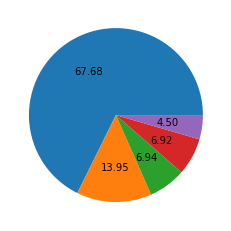

In [ ]:
plt.pie(df['stars'].value_counts(),autopct='%0.2f')
plt.show()

In [ ]:
df['stars'].value_counts()

5.0    13548
4.0     2793
1.0     1389
3.0     1386
2.0      901
Name: stars, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20017 entries, 0 to 20646
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   stars     20017 non-null  float64
 1   comment   20017 non-null  object 
 2   book_url  20017 non-null  object 
dtypes: float64(1), object(2)
memory usage: 625.5+ KB


In [ ]:
df.describe()

,stars
count,20017.000000
mean,4.309387
std,1.206227
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['num_words']=df['comment'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df['num_sent']=df['comment'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df

,stars,comment,book_url,num_words,num_sent
0,5.0,"Let me say at the outset of this review, that ...",https://www.amazon.com/dp/1492041130,316,12
1,1.0,Its Capitalism at its best. I read the book fr...,https://www.amazon.com/dp/1492041130,223,10
2,5.0,If you're looking to get started with data sci...,https://www.amazon.com/dp/1492041130,73,2
3,4.0,"In general, this is a good book. It covers a w...",https://www.amazon.com/dp/1492041130,121,4
4,5.0,I was an academic data scientist decades befor...,https://www.amazon.com/dp/1492041130,166,6
...,...,...,...,...,...
20642,3.0,This book offers nice information and thoughts...,https://www.amazon.com/dp/0980200482,35,3
20643,5.0,"Am disabled, retired RN, but always wished I w...",https://www.amazon.com/dp/0980200482,37,3
20644,3.0,At one point I considered library work as oppo...,https://www.amazon.com/dp/0980200482,92,6
20645,5.0,"Overall, I think this is an excellent resource...",https://www.amazon.com/dp/0980200482,96,4


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


In [ ]:
def tran_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)



In [ ]:
df['trans_comment']=df['comment'].apply(tran_text)

In [ ]:
df['trans_comment'][2]

'look get start data scienc confus materi use video book specif onlin class etc start book see take book give great place start afterward enough knowledg make educ choic educ resourc use next'

In [ ]:
df['comment'][0]

'Let me say at the outset of this review, that I respect the author and the sheer guile of trying to attack what is a Ph.D. level topic, in a single book. I have been an SW engineer for the last 15 years, have an engineering degree, and have done some research into GA\'s and image segmentation, many years ago... and I found this book challenging.When I was in college, the joke about Comp Sci was that it was really just "applied math." That wasn\'t really funny, but it is gosh-darned true, doubly so when dealing with data science, AI, and ML, all of which are fancy words for "applied statistics."So, the book gives you a background in various topics such as stat, probability theory, linear algebra, programming, and touches on a few topics from calculus. If you\'re unfamiliar with those things, you will not be able to learn them from one book, or all at once. It\'s just too much.The author leaves lots of bread-crumbs for you to follow. If you\'re not strong any of the subjects I\'ve menti

In [ ]:
df

,stars,comment,book_url,num_words,num_sent,trans_comment
0,5.0,"Let me say at the outset of this review, that ...",https://www.amazon.com/dp/1492041130,316,12,let say outset review respect author sheer gui...
1,1.0,Its Capitalism at its best. I read the book fr...,https://www.amazon.com/dp/1492041130,223,10,capit best read book nearbi bookstor like revi...
2,5.0,If you're looking to get started with data sci...,https://www.amazon.com/dp/1492041130,73,2,look get start data scienc confus materi use v...
3,4.0,"In general, this is a good book. It covers a w...",https://www.amazon.com/dp/1492041130,121,4,gener good book cover wide varieti topic goe e...
4,5.0,I was an academic data scientist decades befor...,https://www.amazon.com/dp/1492041130,166,6,academ data scientist decad term coin love boo...
...,...,...,...,...,...,...
20642,3.0,This book offers nice information and thoughts...,https://www.amazon.com/dp/0980200482,35,3,book offer nice inform thought think becom lib...
20643,5.0,"Am disabled, retired RN, but always wished I w...",https://www.amazon.com/dp/0980200482,37,3,disabl retir rn alway wish librarian perhap en...
20644,3.0,At one point I considered library work as oppo...,https://www.amazon.com/dp/0980200482,92,6,one point consid librari work oppos work liter...
20645,5.0,"Overall, I think this is an excellent resource...",https://www.amazon.com/dp/0980200482,96,4,overal think excel resourc anyon pursu career ...


In [ ]:
range=['1','2','3','4','5']

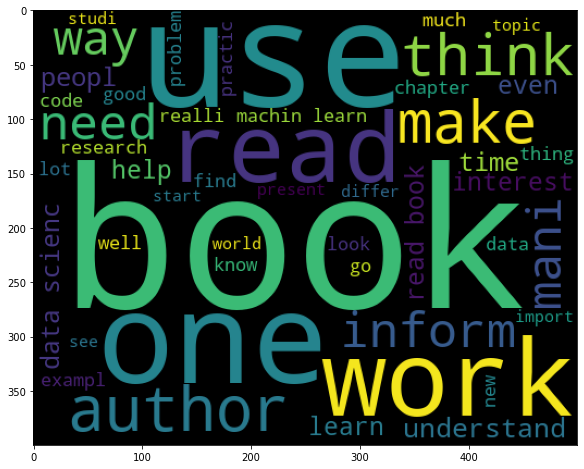

In [ ]:
  from wordcloud import WordCloud
  wc=WordCloud(height=400,width=500,min_font_size=10)
  new_comment=wc.generate(df[df['stars']==5]['trans_comment'].str.cat(sep=" "))
  plt.figure(figsize=(10,8))
  plt.imshow(new_comment)
  plt.show()


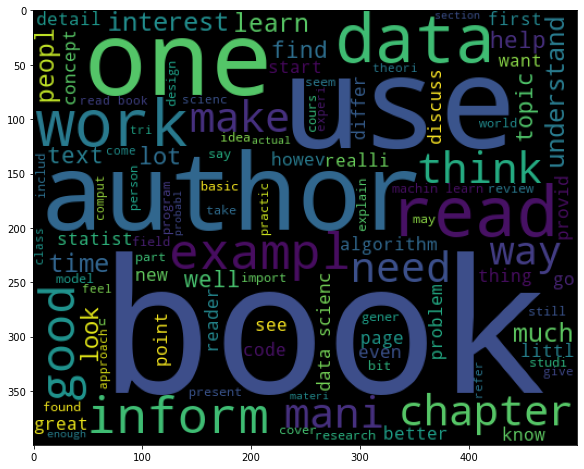

In [ ]:
  from wordcloud import WordCloud
  wc=WordCloud(height=400,width=500,min_font_size=10)
  new_comment=wc.generate(df[df['stars']==4]['trans_comment'].str.cat(sep=" "))
  plt.figure(figsize=(10,8))
  plt.imshow(new_comment)
  plt.show()

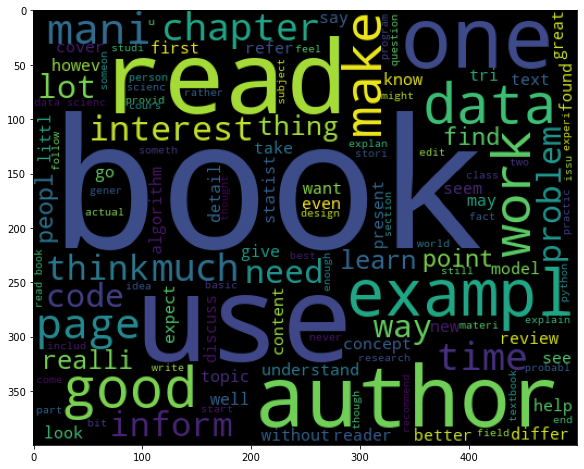

In [ ]:
  from wordcloud import WordCloud
  wc=WordCloud(height=400,width=500,min_font_size=10)
  new_comment=wc.generate(df[df['stars']==3]['trans_comment'].str.cat(sep=" "))
  plt.figure(figsize=(10,8))
  plt.imshow(new_comment)
  plt.show()

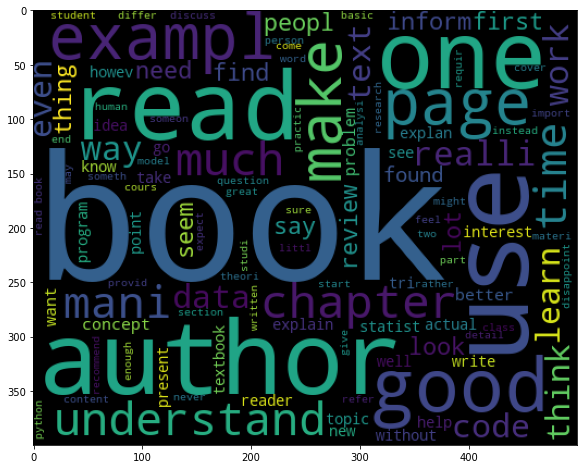

In [ ]:
  from wordcloud import WordCloud
  wc=WordCloud(height=400,width=500,min_font_size=10)
  new_comment=wc.generate(df[df['stars']==2]['trans_comment'].str.cat(sep=" "))
  plt.figure(figsize=(10,8))
  plt.imshow(new_comment)
  plt.show()

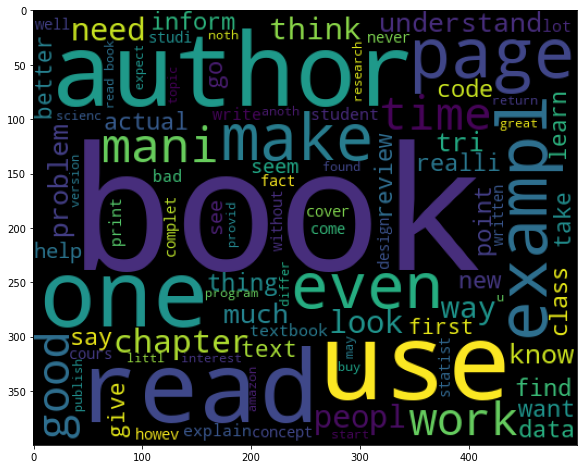

In [ ]:
  from wordcloud import WordCloud
  wc=WordCloud(height=400,width=500,min_font_size=10)
  new_comment=wc.generate(df[df['stars']==1]['trans_comment'].str.cat(sep=" "))
  plt.figure(figsize=(10,8))
  plt.imshow(new_comment)
  plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()


In [ ]:
x=cv.fit_transform(df['comment']).toarray()

In [ ]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y=df['stars']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)



In [ ]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [ ]:
gb=GaussianNB()
mb=MultinomialNB()
rfc=RandomForestClassifier()

In [ ]:
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))



[[  24    1    0    0  263]
 [   6    2    2    1  160]
 [   3    1    1    3  248]
 [   2    1    0    5  572]
 [   1    0    3    5 2700]]
0.6823176823176823
